In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/wide_format_data_no_duplicates.pkl")

In [4]:
print(df.shape)
df.head()

(1665688, 6)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147483541,[2059949086],"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,-2147481037,[-1245770865],"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]"
2,-2147474335,[-1929965268],"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,-2147474305,[1098145658],"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,-2147472167,[889210381],"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [5]:
df.columns

Index(['customer_id', 'account_id', 'ed_id', 'event_name', 'event_timestamp',
       'journey_steps_until_end'],
      dtype='object')

In [6]:
df.dtypes

customer_id                 int64
account_id                 object
ed_id                      object
event_name                 object
event_timestamp            object
journey_steps_until_end    object
dtype: object

## Examining first/last events

In [7]:
first_events = df['event_name'].apply(lambda x: x[0] if x else None)
last_events = df['event_name'].apply(lambda x: x[-1] if x else None)

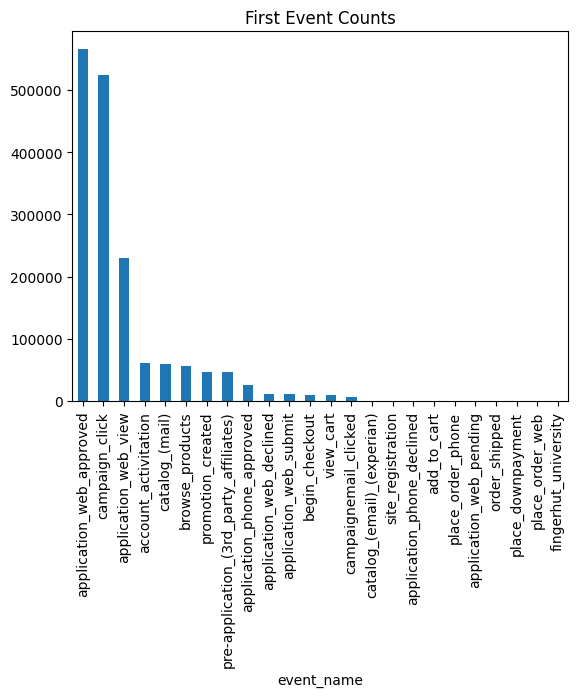

In [8]:
first_events.value_counts().plot(kind = 'bar')
plt.title("First Event Counts")
plt.show()

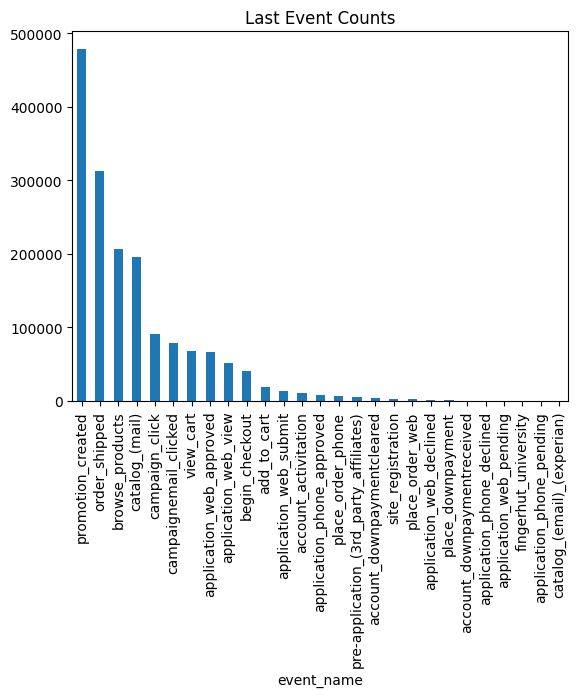

In [9]:
last_events.value_counts().plot(kind = 'bar')
plt.title("Last Event Counts")
plt.show()

In [10]:
df_with_orders = df[df['event_name'].apply(lambda x: 'order_shipped' in x)]

In [11]:
print(df_with_orders.shape)
df_with_orders.head()

(320686, 6)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
2,-2147474335,[-1929965268],"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,-2147472167,[889210381],"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
13,-2147452610,"[-292633108, -1905163177]","[12, 1, 29, 3, 4, 11, 19, 5, 6, 7, 5, 8, 6, 8,...","[application_web_approved, promotion_created, ...","[2023-07-25 19:46:36+00:00, 2023-07-25 20:32:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
25,-2147425125,[221594945],"[2, 19, 19, 19, 19, 19, 19, 19, 19, 19, 3, 19,...","[campaign_click, application_web_view, applica...","[2021-09-25 06:00:00+00:00, 2021-09-25 19:59:2...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
32,-2147395611,[674764100],"[29, 2, 12, 4, 4, 4, 4, 4, 11, 4, 4, 11, 4, 5,...","[account_activitation, campaign_click, applica...","[2021-06-15 00:00:00+00:00, 2021-06-15 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [12]:
df_no_orders = df[df['event_name'].apply(lambda x: 'order_shipped' not in x)]

In [13]:
print(df_no_orders.shape)
df_no_orders.head()

(1345002, 6)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147483541,[2059949086],"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,-2147481037,[-1245770865],"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 5, 6, 7]"
3,-2147474305,[1098145658],"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
5,-2147466542,[-823743386],"[12, 1, 4, 11, 5, 1, 1, 21, 1, 21, 21, 1]","[application_web_approved, promotion_created, ...","[2021-12-25 22:00:57+00:00, 2021-12-25 22:01:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
6,-2147466262,[-296951572],"[2, 13, 19, 19, 12, 1, 4, 5, 19, 6, 3, 11, 2, 4]","[campaign_click, application_web_declined, app...","[2023-04-10 02:34:58+00:00, 2023-04-10 20:34:5...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"


### Feature Engineering

In [14]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
def_df

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [15]:
stage_dict = {'Apply for Credit' : 1, 'Credit Account' : 2, 'Discover' : 3, 'Downpayment' : 4, 'First Purchase' : 5, 
              'Order Shipped' : 6, 'Prospecting' : 7}
def_df['stage_int'] = def_df['stage'].map(stage_dict)

In [16]:
stage_mapping_dict = def_df.set_index('event_definition_id')['stage_int'].to_dict()

In [17]:
sampled_df = df.sample(n=10000, replace=False)

In [21]:
def_df

,event_name,journey_id,event_definition_id,milestone_number,stage,stage_int
0,application_phone_approved,1,15,1.0,Apply for Credit,1
1,application_phone_declined,1,16,NaN,Apply for Credit,1
2,application_phone_pending,1,17,NaN,Apply for Credit,1
3,application_web_approved,1,12,1.0,Apply for Credit,1
4,application_web_declined,1,13,NaN,Apply for Credit,1
5,application_web_pending,1,14,NaN,Apply for Credit,1
6,application_web_submit,1,3,NaN,Apply for Credit,1
7,application_web_view,1,19,NaN,Apply for Credit,1
8,account_activitation,1,29,3.0,Credit Account,2
9,account_fraud_review,1,37,NaN,Credit Account,2


In [18]:
# Function to get the stage from the first id in the list
def get_stage_from_first_id(id_list):
    # Get the first id
    first_id = id_list[0]
    # Return the corresponding stage using the mapping dictionary
    return stage_mapping_dict.get(first_id, 0)

def get_stage_from_last_id(id_list):
    # Get the first id
    last_id = id_list[-1]
    # Return the corresponding stage using the mapping dictionary
    return stage_mapping_dict.get(last_id, 0)

def clean_df(df):
    df = df.reset_index(drop = True)
    df['event_count'] = df['event_name'].apply(len)
    df['num_accounts'] = df['account_id'].apply(len)
    df['first_event'] = df['ed_id'].apply(lambda x: x[0] if x else None)
    df['last_event'] = df['ed_id'].apply(lambda x: x[-1] if x else None)
    df['len_journey'] = df['journey_steps_until_end'].apply(len)
    
    df['days_in_journey'] = df['event_timestamp'].apply(lambda x: (x[-1] - x[0]).days)
    
    df['first_stage'] = df['ed_id'].apply(get_stage_from_first_id)
    df['last_stage'] = df['ed_id'].apply(get_stage_from_last_id)

    # now create columns for whether a specific event is present or not
    # remember that ideal journey is defined as: Apply for credit > Make a first purchase > Make the down payment > Order Ships
    df['order_shipped'] = df['event_name'].apply(lambda x: 1 if 'order_shipped' in x else 0)
    df['apply_for_credit'] = df['event_name'].apply(lambda x: 1 if 'Apply for Credit' in x else 0)

    promotion_ids = [2, 9, 20, 21, 1, 24]
    df['promotion_exposure'] = df['ed_id'].apply(lambda x: 1 if any([i in x for i in promotion_ids]) else 0)

    df['account_activation'] = df['event_name'].apply(lambda x: 1 if 'account_activitation' in x else 0)

    df['place_order_web'] = df['event_name'].apply(lambda x: 1 if 'place_order_web' in x else 0)
    df['place_order_phone'] = df['event_name'].apply(lambda x: 1 if 'place_order_phone' in x else 0)
    
    df = df.drop(['event_name', 'event_timestamp', 'account_id', 'ed_id', 'journey_steps_until_end'], axis = 1)
    # did not remove customer_id
    
    return df

In [19]:
sampled_df = clean_df(sampled_df)
whole_sampled_df = clean_df(df)

In [29]:
sampled_df.to_pickle("clustering_sample_df.pkl")

In [30]:
sampled_df.head()

,customer_id,event_count,order_shipped,num_accounts,first_event,last_event,len_journey,days_in_journey,first_stage,last_stage
0,905763411,26,0,1,12,1,26,142,1,0
1,423462131,24,1,1,19,28,24,2,1,6
2,1082378652,23,0,1,2,1,23,83,3,0
3,1449115718,2,0,1,21,12,2,25,7,1
4,391848956,93,1,1,2,28,93,231,3,6


In [31]:
whole_sampled_df.to_pickle(("/Users/alyssaliu/Desktop/StatsM148/feature_engineered_data.pkl"))

In [32]:
X = whole_sampled_df.drop(['order_shipped', 'customer_id'], axis = 1)
y = whole_sampled_df['order_shipped']

In [33]:
print(whole_sampled_df.shape)

(1665688, 10)


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
clf = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [37]:
print('accurary', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accurary 0.9864811762522786
precision 0.9534482599592314
recall 0.9774571174612781
f1 0.9653034257672607


In [38]:
# Get the coefficients from the logistic regression model
coefficients = clf.coef_[0]  # For binary classification, model.coef_ is 2D, hence [0] for the first class
# Pair feature names with coefficients
feature_importance = zip(X_train.columns, coefficients)

# Sort features by absolute value of coefficient, in descending order
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

for feature, coef in sorted_features:
    print(f"{feature}: {coef}")


num_accounts: 3.4755517724127447
last_stage: 0.712167368167687
last_event: 0.7104152120379309
first_stage: 0.033970768356683494
first_event: 0.027507199624616754
event_count: 0.006315750800497479
len_journey: 0.006315750800497479
days_in_journey: -0.003120357638970499


## Try cross fold validation in case overfitting

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [40]:
model = LogisticRegression(max_iter=10000, verbose=1)

In [41]:
# Specify the number of folds, e.g., 10
k = 10

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Print the accuracy for each fold
print(f'Accuracy for each fold: {scores}')

# Print the mean accuracy across all folds
print(f'Mean accuracy: {np.mean(scores)}')


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11202D+01


 This problem is unconstrained.



At iterate   50    f=  2.69379D-01    |proj g|=  1.54689D-01

At iterate  100    f=  1.32809D-01    |proj g|=  2.56813D-01

At iterate  150    f=  8.98203D-02    |proj g|=  1.79502D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    156    178      1     0     0   4.638D-05   8.982D-02
  F =   8.9820308120815942E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11462D+01


 This problem is unconstrained.



At iterate   50    f=  2.35844D-01    |proj g|=  1.60864D+00

At iterate  100    f=  1.09589D-01    |proj g|=  7.60553D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    143    164      1     0     0   7.058D-05   8.958D-02
  F =   8.9583037755246731E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11423D+01


 This problem is unconstrained.



At iterate   50    f=  2.69277D-01    |proj g|=  1.52105D+00

At iterate  100    f=  1.05879D-01    |proj g|=  1.93035D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    140    163      1     0     0   3.818D-05   8.961D-02
  F =   8.9613055392985835E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11652D+01


 This problem is unconstrained.



At iterate   50    f=  1.47119D-01    |proj g|=  4.01223D-01

At iterate  100    f=  1.23145D-01    |proj g|=  5.08949D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    140    168      1     0     0   4.449D-05   8.993D-02
  F =   8.9931155203998747E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11423D+01


 This problem is unconstrained.



At iterate   50    f=  1.44309D-01    |proj g|=  3.41876D-02

At iterate  100    f=  9.07666D-02    |proj g|=  1.95681D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    147    170      1     0     0   5.100D-05   8.984D-02
  F =   8.9841700633551597E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11274D+01


 This problem is unconstrained.



At iterate   50    f=  2.36002D-01    |proj g|=  2.76553D+00

At iterate  100    f=  1.02130D-01    |proj g|=  9.40030D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    135    156      1     0     0   8.007D-05   8.966D-02
  F =   8.9656701290633203E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11200D+01


 This problem is unconstrained.



At iterate   50    f=  1.83724D-01    |proj g|=  1.01144D+00

At iterate  100    f=  1.31355D-01    |proj g|=  3.84024D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    147    173      1     0     0   4.571D-05   9.011D-02
  F =   9.0106735646083527E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11536D+01


 This problem is unconstrained.



At iterate   50    f=  1.42276D-01    |proj g|=  1.04491D+00

At iterate  100    f=  9.03669D-02    |proj g|=  1.24381D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    118    140      1     0     0   6.594D-05   9.034D-02
  F =   9.0336080076267769E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11657D+01


 This problem is unconstrained.



At iterate   50    f=  2.03270D-01    |proj g|=  3.80876D+00

At iterate  100    f=  1.33672D-01    |proj g|=  7.39305D-02

At iterate  150    f=  8.98146D-02    |proj g|=  1.17650D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    166    191      1     0     0   6.953D-05   8.981D-02
  F =   8.9814271135521165E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.11573D+01


 This problem is unconstrained.



At iterate   50    f=  1.44722D-01    |proj g|=  4.44289D-01

At iterate  100    f=  1.04158D-01    |proj g|=  2.28790D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    128    145      1     0     0   2.688D-05   9.006D-02
  F =   9.0055762378629403E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Accuracy for each fold: [0.98627596 0.9858317  0.98628796 0.98654011 0.98662416 0.98613187
 0.98661816 0.9870324  0.98635392 0.98619783]
Mean accuracy: 0.9863894077239767


### Look more into customers with multiple accounts

In [42]:
df_mult_acc = df[df['account_id'].apply(lambda x: len(x) > 1)]
df_mult_acc.reset_index(drop = True)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147452610,"[-292633108, -1905163177]","[12, 1, 29, 3, 4, 11, 19, 5, 6, 7, 5, 8, 6, 8,...","[application_web_approved, promotion_created, ...","[2023-07-25 19:46:36+00:00, 2023-07-25 20:32:2...","[1, 2, 3, 4, 5, 9, 11, 21, 23, 24, 25, 26, 27,..."
1,-2147450752,"[-689682723, 170014062]","[4, 11, 1, 5, 6, 15, 19, 18, 19, 19, 19, 19, 1...","[browse_products, add_to_cart, promotion_creat...","[2022-05-17 19:11:25+00:00, 2022-05-17 19:11:4...","[1, 2, 3, 4, 5, 6, 7, 9, 10, 13, 16, 17, 18, 1..."
2,-2147354878,"[868852074, 1291266245]","[19, 19, 19, 19, 19, 19, 19, 3, 12, 4, 4, 4, 1...","[application_web_view, application_web_view, a...","[2022-01-22 13:23:16+00:00, 2022-01-22 13:23:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,-2147300111,"[-712662595, 1060160414]","[4, 2, 12, 4, 19, 3, 1, 11, 4, 4, 19, 19, 19, ...","[browse_products, campaign_click, application_...","[2023-07-18 14:02:37+00:00, 2023-07-19 00:54:4...","[1, 2, 3, 4, 11, 24, 25, 26, 27, 30, 1, 2, 3, ..."
4,-2147276503,"[-1356576694, 1958756284]","[19, 19, 19, 19, 19, 19, 19, 19, 19, 3, 12, 19...","[application_web_view, application_web_view, a...","[2022-11-07 13:44:15+00:00, 2022-11-07 13:44:1...","[1, 4, 5, 8, 10, 11, 12, 13, 14, 16, 17, 1, 2,..."
...,...,...,...,...,...,...
68346,2147215047,"[-2011251879, 333935495]","[12, 4, 4, 4, 4, 4, 4, 11, 4, 11, 4, 4, 4, 4, ...","[application_web_approved, browse_products, br...","[2021-03-24 11:00:21+00:00, 2021-03-24 11:07:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
68347,2147262949,"[-1467614890, -2014263723, 1258989806]","[12, 24, 3, 3, 3, 3, 3, 12, 4, 4, 4, 4, 4, 4, ...","[application_web_approved, campaignemail_click...","[2023-09-10 02:06:23+00:00, 2023-09-10 06:59:0...","[1, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ..."
68348,2147312732,"[-984987413, -1697443035]","[5, 5, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, ...","[view_cart, view_cart, application_web_view, a...","[2022-05-22 19:14:41+00:00, 2022-05-22 19:29:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15..."
68349,2147398782,"[1087620278, -1146833418]","[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[application_web_view, application_web_view, a...","[2022-06-28 16:03:28+00:00, 2022-06-28 16:03:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 1,..."


In [43]:
df_mult_acc['order_shipped'] = df_mult_acc['event_name'].apply(lambda x: 1 if 'order_shipped' in x else 0)

/var/folders/x3/sb0g2l5d0bx050hnt31710zw0000gn/T/ipykernel_905/3525165812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mult_acc['order_shipped'] = df_mult_acc['event_name'].apply(lambda x: 1 if 'order_shipped' in x else 0)


In [44]:
df_mult_acc['order_shipped'].value_counts(normalize = True)

order_shipped
0    0.759696
1    0.240304
Name: proportion, dtype: float64

In [45]:
df_one_acc = df[df['account_id'].apply(lambda x: len(x) == 1)]
df_one_acc.reset_index(drop = True)

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
0,-2147483541,[2059949086],"[12, 5, 4, 11, 5, 6, 1, 4, 11, 4, 11, 5, 6, 5,...","[application_web_approved, view_cart, browse_p...","[2021-10-05 08:11:26+00:00, 2021-10-05 08:17:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,-2147481037,[-1245770865],"[12, 1, 2, 5, 11, 4, 6]","[application_web_approved, promotion_created, ...","[2023-08-26 12:08:34+00:00, 2023-08-26 17:18:4...","[1, 2, 3, 4, 7, 8, 11]"
2,-2147474335,[-1929965268],"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 16, 17, 19, 22, 23, 24, 25, 27, 33, ..."
3,-2147474305,[1098145658],"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 1..."
4,-2147472167,[889210381],"[12, 19, 3, 4, 4, 1, 1, 11, 5, 4, 11, 5, 4, 6,...","[application_web_approved, application_web_vie...","[2023-02-19 08:23:54+00:00, 2023-02-19 14:21:5...","[1, 2, 13, 14, 16, 17, 18, 19, 20, 22, 24, 27,..."
...,...,...,...,...,...,...
1597332,2147480051,[-148210516],"[21, 22, 2, 12, 24, 1, 21, 1, 1, 21, 1, 1, 1, 1]","[catalog_(mail), pre-application_(3rd_party_af...","[2020-12-18 00:00:00+00:00, 2021-01-23 06:00:0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
1597333,2147480182,[-1286764612],"[12, 2, 24, 4, 24, 24, 24, 24, 24]","[application_web_approved, campaign_click, cam...","[2023-06-22 09:44:49+00:00, 2023-06-22 15:44:4...","[1, 2, 3, 4, 10, 11, 12, 13, 14]"
1597334,2147480920,[496493954],"[2, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4, ...","[campaign_click, application_web_view, applica...","[2022-05-21 06:00:00+00:00, 2022-05-21 23:30:3...","[1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 15, 16, 17, ..."
1597335,2147482120,[-488077144],"[12, 19, 2]","[application_web_approved, application_web_vie...","[2023-07-30 15:22:56+00:00, 2023-07-30 20:18:5...","[1, 2, 4]"


In [46]:
df_one_acc['order_shipped'] = df_one_acc['event_name'].apply(lambda x: 1 if 'order_shipped' in x else 0)

/var/folders/x3/sb0g2l5d0bx050hnt31710zw0000gn/T/ipykernel_905/3649822750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one_acc['order_shipped'] = df_one_acc['event_name'].apply(lambda x: 1 if 'order_shipped' in x else 0)


In [47]:
df_one_acc['order_shipped'].value_counts(normalize = True)

order_shipped
0    0.80952
1    0.19048
Name: proportion, dtype: float64